In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/News.csv", index_col=0)


data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
data.shape

(44919, 5)

In [4]:
data['class'].unique()

array([0, 1])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = data.drop(['date','subject','title'],axis=1)

In [7]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [9]:
data.isnull().sum()

,0
text,0
class,0


In [10]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)
data.head()

,text,class
0,(Reuters) - Democratic presidential candidates...,1
1,WASHINGTON (Reuters) - The attorney for former...,1
2,WASHINGTON (Reuters) - Ronald Vitiello has bee...,1
3,LONDON (Reuters) - U.S. presidential candidate...,1
4,PARIS (Reuters) - World powers attempted to sh...,1


<Axes: xlabel='class', ylabel='count'>

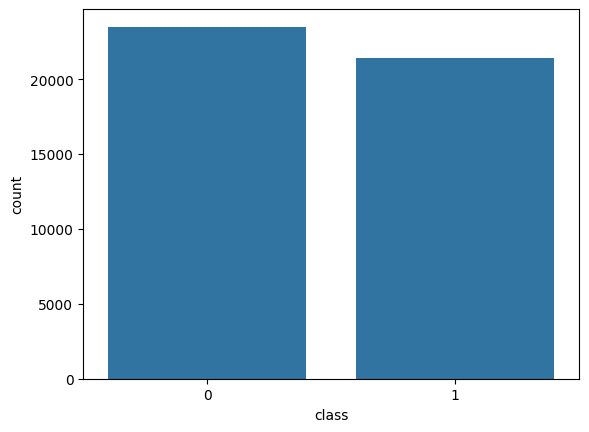

In [11]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)


In [12]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

 52%|█████▏    | 23147/44919 [11:38<11:16, 32.16it/s]

In [ ]:
data['text']

,text
0,donald trump wish americans happy new year lea...
1,house intelligence committee chairman devin nu...
2,on friday revealed former milwaukee sheriff da...
3,on christmas day donald trump announced would ...
4,pope francis used annual christmas day message...
...,...
44914,brussels reuters nato allies tuesday welcomed ...
44915,london reuters lexisnexis provider legal regul...
44916,minsk reuters in shadow disused sovietera fact...
44917,moscow reuters vatican secretary state cardina...


In [ ]:
data.to_csv('preprocessed_review.csv')
from google.colab import files
files.download ('preprocessed_review.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Real
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


KeyError: 'class'

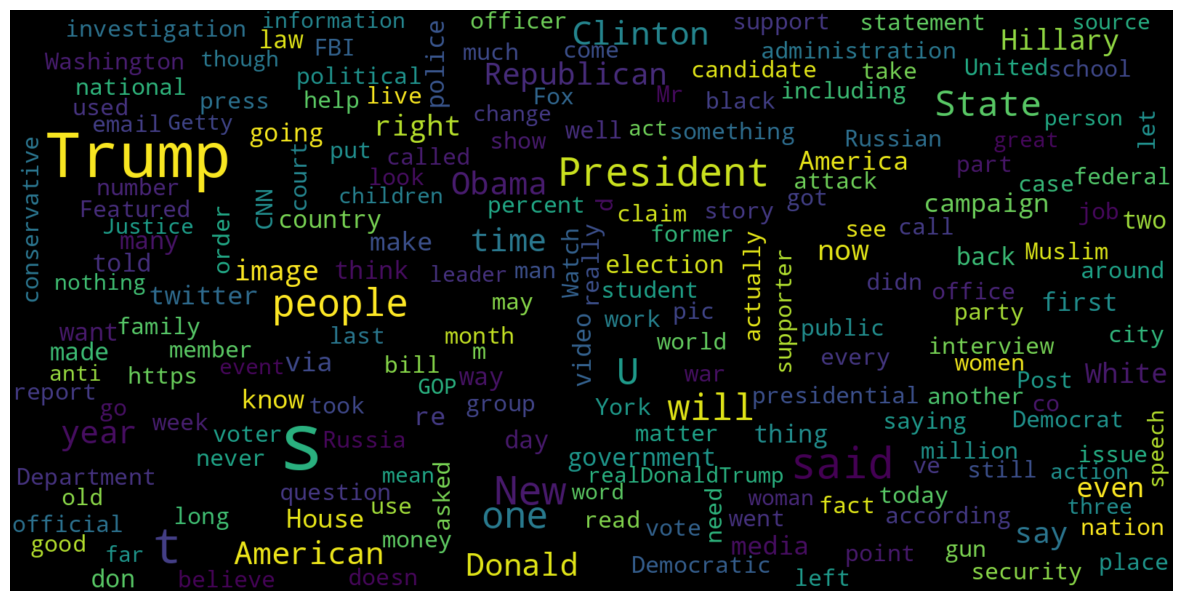

In [ ]:
# Fake
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

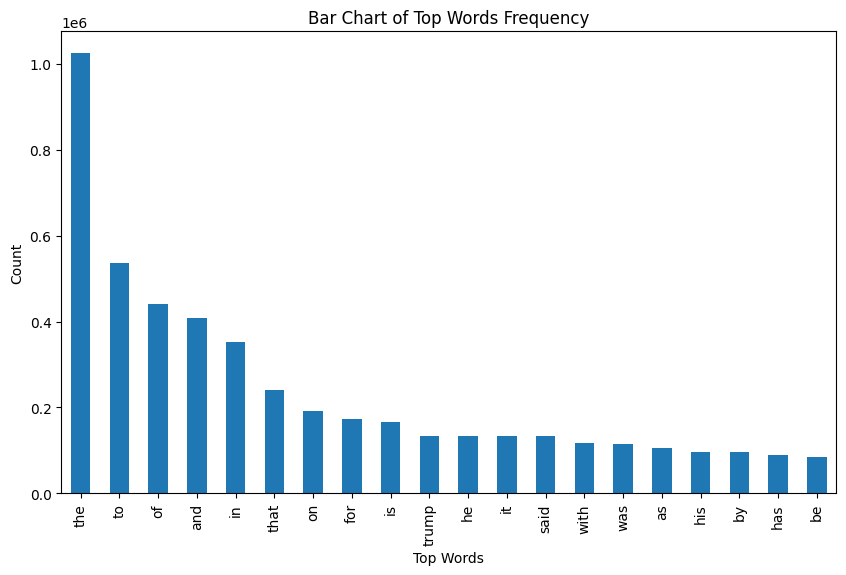

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)


In [ ]:
!pip install tensorflow-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
# model = LogisticRegression()
# model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703167205913
0.9904719501335708


In [ ]:
import joblib
from google.colab import files

# Save the Random Forest model
joblib.dump(rf_model, '/content/random_forest_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorization, '/content/tfidf_vectorizer.pkl')

# Make the files available for download
files.download('/content/random_forest_model.pkl')
files.download('/content/tfidf_vectorizer.pkl')

print("Model and vectorizer saved and ready for download!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model and vectorizer saved and ready for download!


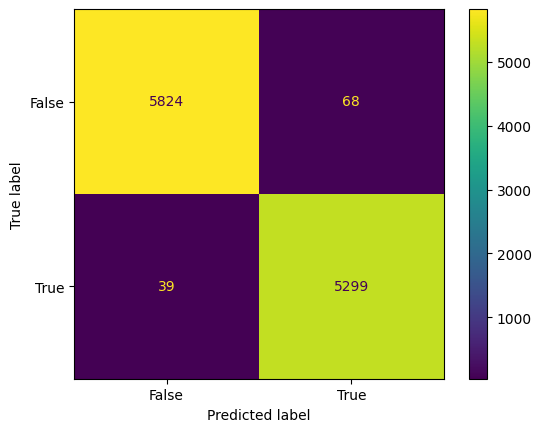

In [ ]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, model.predict(x_test)))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, model.predict(x_test)))


Confusion Matrix:
[[5824   68]
 [  39 5299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5892
           1       0.99      0.99      0.99      5338

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



In [ ]:
# Allow user input for prediction
user_input = input("Enter a news article text to predict if it's real or fake: ")

# Transform the user input using the same vectorizer and predict
user_input_tfidf = vectorization.transform([user_input])
prediction = rf_model.predict(user_input_tfidf)

# Output the prediction
if prediction[0] == 1:
    print("Prediction:Real News")
elif prediction[0] == 0:
    print("Prediction: Fake News")
else:
    print("Prediction: Unknown")

Enter a news article text to predict if it's real or fake: Motorway Police Issued Official Notification on Alto Ban
Prediction: Fake News
